# How Machine Learning Is Enhancing Fraud Detection

Online transactions have shot up manifolds and so have cases of online fraud. The Consumer Sentinel Network maintained by FTC received 3.2 million reports of identity theft and online fraud in 2019. With fraudsters becoming more adept at finding and exploiting loopholes in systems, fraud management has turned painful for the banking and finance industry. Thankfully, machine learning for fraud detection has come to the rescue of financial organizations.

# FRAUD DETECTION GONE WRONG — HUMAN REVIEW AND TRANSACTION RULES

According to Fraud Benchmark Report by cybersource 83% of North American businesses conduct manual reviews, and on an average, they review 29% of orders manually. Involvement of humans gives insights about fraud patterns and genuine customer behavior. These insights can fine tune automated screening rules. But the manual review is costly, time-consuming and leads to high false negatives. Due to low confidence in automated solutions, manual review staff accounts for the substantial amount of their fraud management budget. Businesses must invest in exhaustive training for employees working on the manual review. Training the personnel to manually review transaction is time-consuming and expensive. Manual reviews also increase the time required to fulfill the order. Customer frustration can creep in for services such as digit and software where the customer needs a quick solution.

# UNDERSTANDING MACHINE LEARNING FOR FRAUD DETECTION

Machine learning is the science of designing and applying algorithms that are able to learn things from past cases. It uses complex algorithms that iterate over large data sets and analyze the patterns in data. The algorithm facilitates the machines to respond to different situations for which they have not been explicitly programmed. It is used in spam detection, image recognition, product recommendation, predictive analytics etc. Significant reduction of human effort is the main aim of data scientists in implementing ML. Even with modern analytics tools, it takes a lot of time for humans to read, collect, categorize and analyze the data. ML teaches machines to identify and gauge the importance of patterns in place of humans. Particularly for use cases where data must be analyzed and acted upon in a short amount of time, having the support of machines allows humans to be more efficient and act with confidence.
Machine Learning converts data intensive and confusing information into a simple format that suggests actions to decision makers.

# WHY SHOULD WE USE MACHINE LEARNING IN FRAUD DETECTION?

Machines are much better than humans at processing large datasets. They are able to detect and recognize thousands of patterns on a user’s purchasing journey instead of the few captured by creating rules. We can predict fraud in a large volume of transactions by applying cognitive computing technologies to raw data. This is the reason why we use machine learning algorithms for preventing fraud for our clients. The three factors which explain the importance of machine learning are –

1. **Speed** — In rule-based systems, people create ad hoc rules to determine which types of orders to accept or reject. This process is time-consuming and involves manual interaction. As the velocity of commerce is increasing, it’s very important to have a quicker solution to detect fraud. Our merchants want results fast. In microseconds!! Only machine learning techniques enable us to achieve that with the sort of confidence level needed to approve or decline a transaction. Machine learning can evaluate huge numbers of transactions in real time. It is continuously analyzing and processing new data. Moreover, an advanced model such as neural networks autonomously updating its models to reflect the latest trends.


2. **Scale** — Machine learning algorithms and models become more effective with increasing data sets. Whereas in rule-based models the cost of maintaining the fraud detection system multiplies as customer base increases. Machine-learning improves with more data because the ML model can pick out the differences and similarities between multiple behaviors. Once told which transactions are genuine and which are fraudulent, the systems can work through them and begin to pick out those which fit either bucket. These can also predict them in the future when dealing with fresh transactions. There is a risk in scaling at a fast pace. If there is an undetected fraud in the training data machine learning will train the system to ignore that type of fraud in the future.


3. **Efficiency** — Contrary to humans, machines can perform repetitive tasks. Similarly, ML algorithms do the dirty work of data analysis and only escalate decisions to humans when their input adds insights. ML can often be more effective than humans at detecting subtle or non-intuitive patterns to help identify fraudulent transactions. As discussed earlier, it can also help to avoid false positives.


Moreover, unsupervised ML models can continuously analyze and process new data and then autonomously update its models to reflect the latest trends.

#### Steps

1. Gathering the data
2. Exploring the data
3. Preprocessing the data
4. Splitting the data into train and test sets
5. Modelling
6. Improve the model
7. Save the model

## Data Analysis

### Data Gathering

In this step, the data was gotten from UCI Machine Learning

**About Dataset**

**step -** maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type -** CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount -** amount of the transaction in local currency.

**nameOrig -** customer who started the transaction

**oldbalanceOrg -** initial balance before the transaction

**newbalanceOrig -** new balance after the transaction

**nameDest -** customer who is the recipient of the transaction

**oldbalanceDest -** initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest -** new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud -** This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud -** The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [2]:
# Viewing the data

fraud = pd.read_csv('Fraud.csv')
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Shape of data

fraud.shape

(6362620, 11)

In [4]:
# Size of data

fraud.size

69988820

In [5]:
# Information of data

fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Description of data

fraud.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [7]:
# Data types

fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
# Unique values of data

fraud.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

## Data Preprocessing 

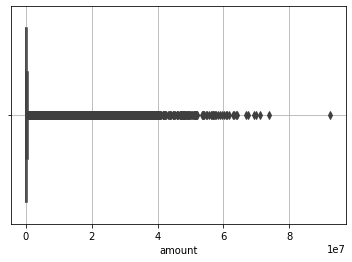

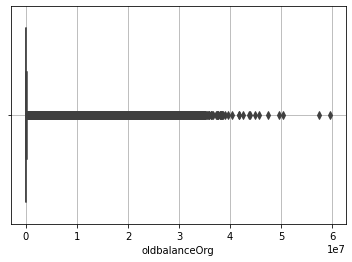

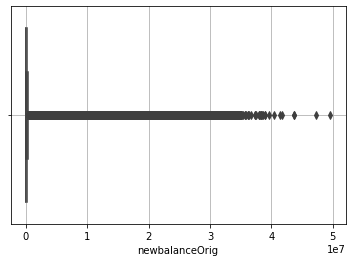

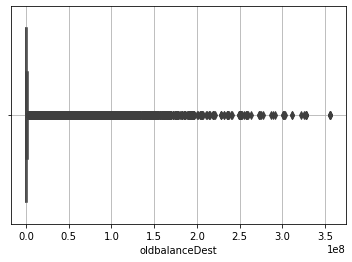

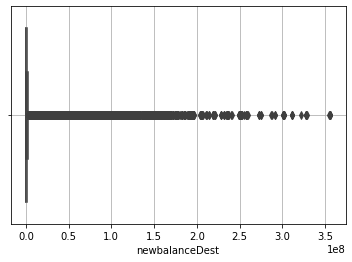

In [11]:
# Descriptive Analysis (Univariate)

import seaborn as sns
cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']
for i in cols:
    sns.boxplot(fraud[i],whis=1.5)
    plt.grid()
    plt.show();

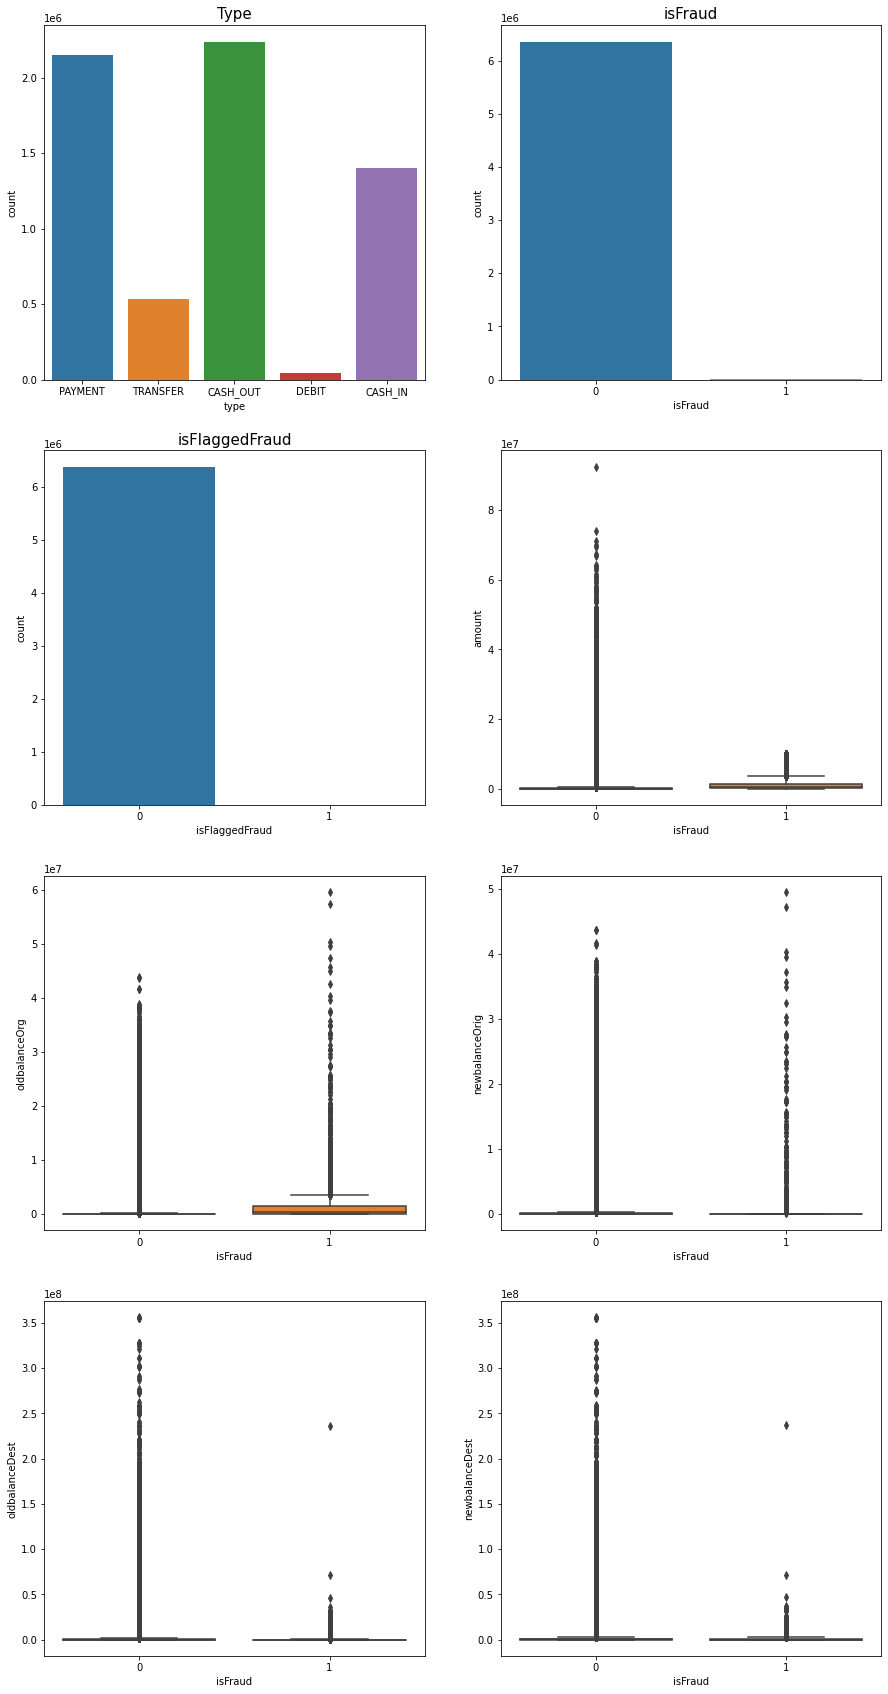

In [13]:
# Bivariate Analysis

fig,ax=plt.subplots(4,2,figsize=(15,30))
sns.countplot(x=fraud.type,ax=ax[0][0]).set_title('Type',size=15);
sns.countplot(x=fraud.isFraud,ax=ax[0][1]).set_title('isFraud',size=15);
sns.countplot(x=fraud.isFlaggedFraud,ax=ax[1][0]).set_title('isFlaggedFraud',size=15);
sns.boxplot(x=fraud.isFraud,y=fraud['amount'],ax=ax[1][1]);
sns.boxplot(x=fraud.isFraud,y=fraud['oldbalanceOrg'],ax=ax[2][0]);
sns.boxplot(x=fraud.isFraud,y=fraud['newbalanceOrig'],ax=ax[2][1]);
sns.boxplot(x=fraud.isFraud,y=fraud['oldbalanceDest'],ax=ax[3][0]);
sns.boxplot(x=fraud.isFraud,y=fraud['newbalanceDest'],ax=ax[3][1]);

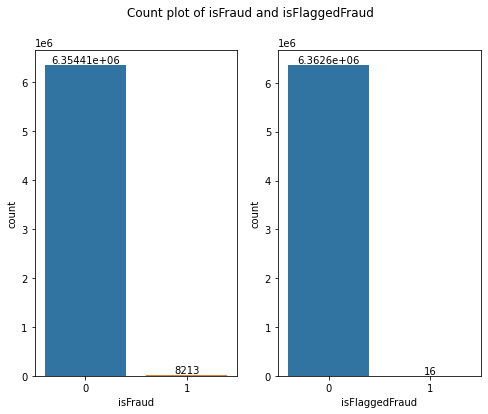

In [14]:
# chart for label class

plt.figure(figsize=(8,6))

plt.subplot(121)
ax = sns.countplot(data=fraud,x='isFraud')
ax.bar_label(ax.containers[0])

plt.subplot(122)
ax = sns.countplot(data=fraud,x='isFlaggedFraud')
ax.bar_label(ax.containers[0])

plt.suptitle('Count plot of isFraud and isFlaggedFraud')
plt.show()

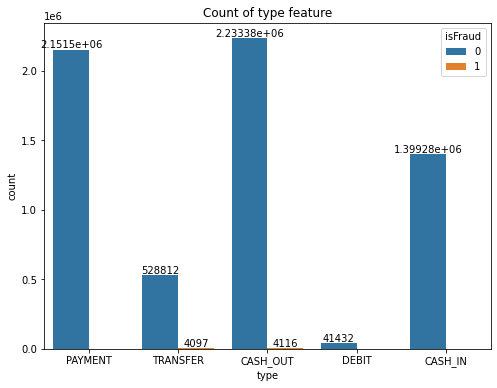

In [15]:
# count of the type feature

plt.figure(figsize=(8,6))
ax = sns.countplot(data=fraud ,x='type',hue='isFraud')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('Count of type feature')
plt.show()

#### Detecting and removing outliers

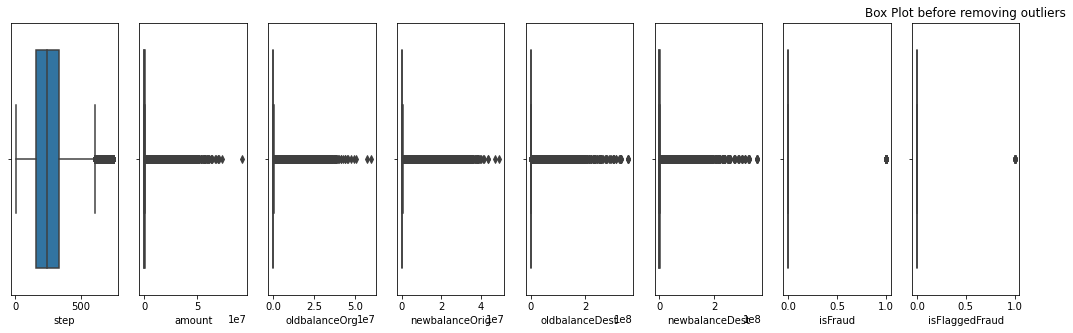

In [17]:
plt.figure(figsize = (25,5))
count = 1
for i in fraud.select_dtypes(np.number).columns[:11]:
    plt.subplot(1,11,count)
    sns.boxplot(data = fraud, x = i)
    count+=1
plt.title("Box Plot before removing outliers")
plt.show()

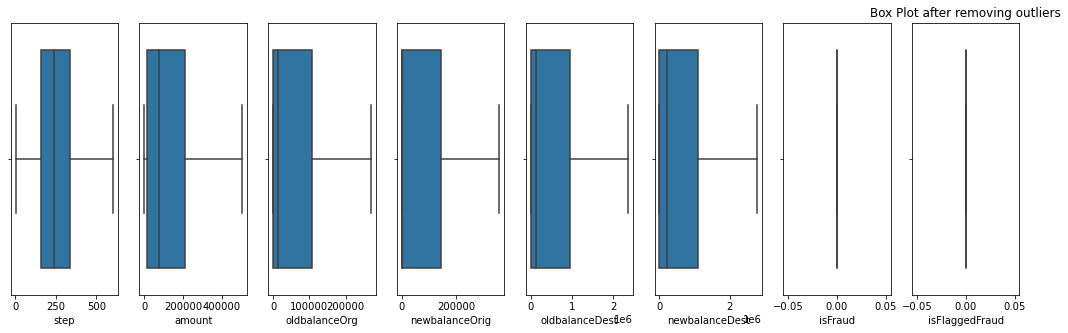

In [18]:
plt.figure(figsize = (25,5))
count = 1
for i in fraud.select_dtypes(np.number).columns[:11]:
    plt.subplot(1,11,count)
    sns.boxplot(data = fraud, x = i, showfliers=False)
    count+=1
plt.title("Box Plot after removing outliers")
plt.show()

#### Checking for missing values

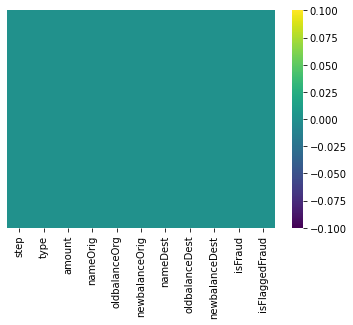

In [19]:
sns.heatmap(fraud.isnull(), cmap = 'viridis')

plt.yticks([])

plt.show()

In [20]:
fraud.isna().all()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [21]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Checking for correlations

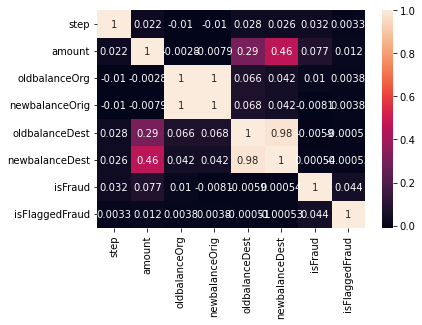

In [22]:
sns.heatmap(fraud.corr(), annot = True)

plt.show()

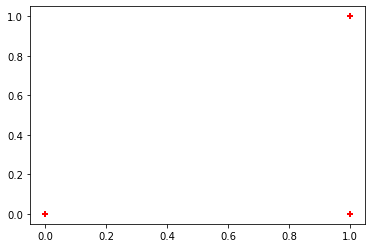

In [23]:
# Scatter plot

plt.scatter(fraud.isFraud, fraud.isFlaggedFraud, marker='+', color='red');

In [24]:
fraud2 = fraud.copy()

##### Converting words to numerals

In [25]:
dummy_type = pd.get_dummies(fraud2['type'], prefix='type', drop_first=True)
dummy_type.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [26]:
fraud2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [27]:
fraud2.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
lable_encoder= LabelEncoder()
fraud2['nameOrig'] = lable_encoder.fit_transform(fraud2['nameOrig'])
fraud2['nameDest'] = lable_encoder.fit_transform(fraud2['nameDest'])
print(fraud2['nameOrig'].head())
print(fraud2['nameDest'].head())

0     757869
1    2188998
2    1002156
3    5828262
4    3445981
Name: nameOrig, dtype: int64
0    1662094
1    1733924
2     439685
3     391696
4     828919
Name: nameDest, dtype: int64


In [29]:
fraud3 = pd.concat([fraud2, dummy_type], axis=1)
fraud3 = fraud3.drop('type', axis=1)

fraud3.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,0,1,0


In [30]:
fraud3.dtypes

step                int64
amount            float64
nameOrig            int64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

#### Normalising the data

In [31]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(fraud3), columns=fraud3.columns)

df_norm

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.000106,0.119287,0.002855,0.003233,0.610534,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000020,0.344545,0.000357,0.000391,0.636919,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000002,0.157738,0.000003,0.000000,0.161509,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000002,0.917359,0.000003,0.000000,0.143881,0.000059,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000126,0.542392,0.000697,0.000603,0.304485,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.889591,0.005701,0.000000,0.185818,0.000000,0.000954,1.0,0.0,1.0,0.0,0.0,0.0
6362616,1.0,0.068272,0.273445,0.105923,0.000000,0.095854,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
6362617,1.0,0.068272,0.084044,0.105923,0.000000,0.039754,0.000192,0.017912,1.0,0.0,1.0,0.0,0.0,0.0
6362618,1.0,0.009195,0.354608,0.014265,0.000000,0.117440,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0


#### Spliting data into train and test sets

In [32]:
X = fraud3.drop('isFraud', axis=1)
y = fraud3['isFraud']

In [33]:
X.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,0,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,0,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,1,0


In [34]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [35]:
X.dtypes

step                int64
amount            float64
nameOrig            int64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Modelling

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [39]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = logisticRegr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.999120645268773


In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.999120645268773

In [43]:
y_pred.shape

(1272524,)

In [44]:
y_test.shape

(1272524,)

In [45]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1270709     195]
 [    924     696]]


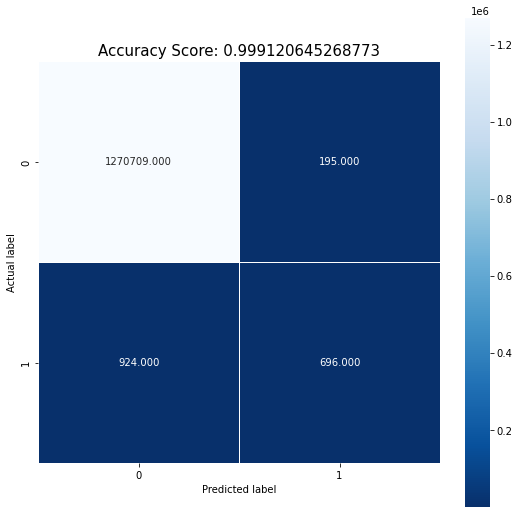

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [60]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [49]:
fraud4 = RandomForestClassifier(random_state=1)
fraud4.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [50]:
fraud4_pred_train = fraud4.predict(X_train)
fraud4_pred_test = fraud4.predict(X_test)

In [51]:
fraud4.score(X_train, y_train)

0.9999996070801023

In [52]:
fraud4.score(X_test, y_test)

0.9996950941593243

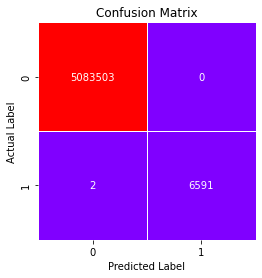

In [77]:
confusion_matrix(y_train, fraud4_pred_train)
sns.heatmap(confusion_matrix(y_train, fraud4_pred_train),annot=True, fmt='d',cbar=False, linewidths=.5, square = True, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.show()

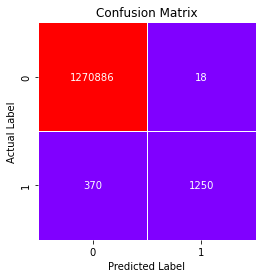

In [78]:
confusion_matrix(y_test, fraud4_pred_test)
sns.heatmap(confusion_matrix(y_test, fraud4_pred_test),annot=True, fmt='d',cbar=False, linewidths=.5, square = True, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.show()

#### Train and improve final model

In [58]:
xgb_model = XGBClassifier(n_estimators=1000)
xgb_model.fit(X_train, y_train, eval_metric='merror')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [59]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
target = sorted(set(y))

print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}')
print(f'Training:\n {classification_report(y_train, y_pred_train, labels=target)}')
print(f'Testing accuracy: {accuracy_score(y_test, y_pred_test)}')
print(f'Testing:\n {classification_report(y_test, y_pred_test, labels=target)}')

Training accuracy: 1.0
Training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       1.00      1.00      1.00      6593

    accuracy                           1.00   5090096
   macro avg       1.00      1.00      1.00   5090096
weighted avg       1.00      1.00      1.00   5090096

Testing accuracy: 0.9998349736429333
Testing:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.90      0.93      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.95      0.97   1272524
weighted avg       1.00      1.00      1.00   1272524



#### Test the model by using it to predict

In [65]:
y_predicted = xgb_model.predict(X_test)

In [66]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
print(len(y_test))

1272524


### Confusion Matrix

In [68]:
confusion_matrix(y_test,y_predicted)

array([[1270858,      46],
       [    164,    1456]])

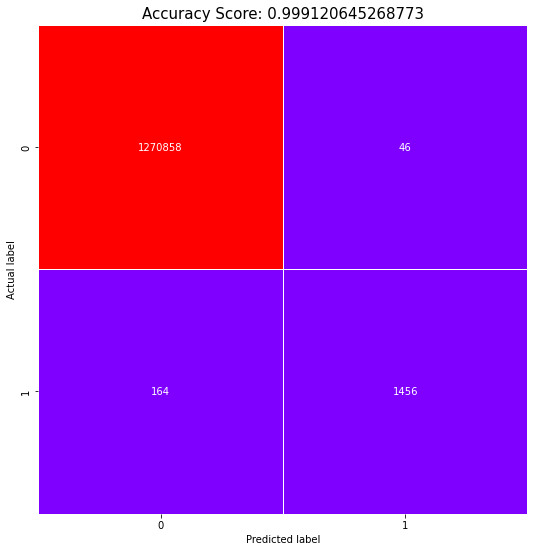

In [79]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_predicted),annot=True, fmt='d',cbar=False, linewidths=.5, square = True, cmap='rainbow');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

As we can see our model is 99% accurate

### Save Model

In [73]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(XGBClassifier(n_estimators=1000), 'xgb_model.pkl')

['xgb_model.pkl']

### Load the saved model

In [74]:
# Load the model from the file
#xgb_from_joblib = joblib.load('xgb_model.pkl')

### Use the loaded model

In [75]:
# Use the loaded model to make predictions
#xgb_from_joblib.predict(X_test)